In [ ]:
#Install package using pip
! pip install text2emotion

In [ ]:
!pip uninstall emoji
!pip install emoji==1.7

In [ ]:
#import libraries
import pandas as pd
import nltk
import string
import text2emotion as te
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# List of Columns
column_list=['id1','id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 
     'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_onfire_counts', 'context', 'extracted justification']


In [ ]:
# Load datasets from drive
df_train=pd.read_csv('/content/drive/MyDrive/dataset/train2.tsv', sep='\t', header=None, index_col=False)
df_test= pd.read_csv('/content/drive/MyDrive/dataset/test2.tsv', sep='\t', header=None, index_col=False)
df_validation=pd.read_csv('/content/drive/MyDrive/dataset/val2.tsv', sep='\t', header=None, index_col=False)

In [ ]:
# Print shape of datasets
print( 'Train Data Shape: ', df_train.shape )
print( 'Test Data Shape: ', df_test.shape )
print( 'Validation Data Shape: ', df_validation.shape )

Train Data Shape:  (10240, 16)
Test Data Shape:  (1267, 16)
Validation Data Shape:  (1284, 16)


In [ ]:
# Concat datasets into single dataframe for feature extractions
df=pd.concat([df_train, df_test, df_validation])
df.columns=column_list
df.head()

,id1,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_onfire_counts,context,extracted justification
0,0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


## **Syntax-based /Lexical Features Extraction**

In [ ]:
# Char count extraction
statements=df['statement'].to_list()
char_count=[]
for statement in statements:
  char_count.append(len(statement))
df['char_count']=char_count

In [ ]:
# Word count extraction
word_count=[]
for statement in statements:
  word_count.append(len(statement.split(' ')))
df['word_count']=word_count

In [ ]:
# sentence_count extraction
sentence_count=[]
for statement in statements:
  sentence_count.append(len(sent_tokenize(statement)) )
df['sentence_count']= sentence_count

In [ ]:
# Stop word count
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stopword_count=[]
for statement in statements:
  word_tokens = word_tokenize(statement) 
  stopwords_x = len([w for w in word_tokens if w in stops])
  stopword_count.append(stopwords_x)
df['stopword_count']=stopword_count

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Upper case word count
Uppercase_count=[]
for statement in statements:
  word_tokens = word_tokenize(statement) 
  Uppercase_x = len([w for w in word_tokens if w.isupper()])
  Uppercase_count.append(Uppercase_x)
df['Uppercase_count']=Uppercase_count

In [ ]:
# Average word length
Averageword_len=[]
for statement in statements:
  sum_wordlenght=0
  word_tokens = word_tokenize(statement) 
  for w in word_tokens:
    sum_wordlenght=sum_wordlenght + len(w)

  Averageword_len.append(sum_wordlenght/len(word_tokens))

df['Averageword_len']=Averageword_len

In [ ]:
# Average sentence length
df['avgsentence_len']=  df['word_count'] / df['sentence_count']

In [ ]:
# Punctuations counts 
Punctuations_count=[]
punc=string.punctuation
for statement in statements:
  Punctuations_x = len([w for w in statement if w in punc])
  Punctuations_count.append(Punctuations_x)
df['Punctuations counts']=Punctuations_count

In [ ]:
# Number count
Number_count=[]
for statement in statements:
  word_tokens = word_tokenize(statement) 
  Number_x = len([w for w in word_tokens if w.isdigit()])
  Number_count.append(Number_x)
df['Number_count']=Number_count

In [ ]:
# Counting POS tags 
NN=[]
CC=[]
JJ=[]
VB=[]
for statement in statements:
  tokens = nltk.word_tokenize(statement.lower())
  text = nltk.Text(tokens)
  tagged = nltk.pos_tag(text)
  from collections import Counter
  counts = Counter(tag for word, tag in tagged)

  if 'NN' in counts:
    NN.append(counts['NN'])
  else:
    NN.append(0)

  if 'CC' in counts:
    CC.append(counts['CC'])
  else:
    CC.append(0)

  if 'JJ' in counts:
    JJ.append(counts['JJ'])
  else:
    JJ.append(0)

  if 'VB' in counts:
    VB.append(counts['VB'])
  else:
    VB.append(0)


df['noun']=NN
df['conjunction']=CC
df['adjective']=JJ
df['verb']=VB

In [ ]:
# Counting POS tags 

RB=[]
IN=[]
PRP=[]
for statement in statements:
  tokens = nltk.word_tokenize(statement.lower())
  text = nltk.Text(tokens)
  tagged = nltk.pos_tag(text)
  from collections import Counter
  counts = Counter(tag for word, tag in tagged)
  
  if 'RB' in counts:
    RB.append(counts['RB'])
  else:
    RB.append(0)

  if 'IN' in counts:
    IN.append(counts['IN'])
  else:
    IN.append(0)

  if 'PRP' in counts:
    PRP.append(counts['PRP'])
  else:
    PRP.append(0)

df['adverb']=RB
df['preposition']=IN
df['pronoun']=PRP

## **Sentiment-based Features**

In [ ]:
from textblob import TextBlob

#Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create function to get emotion
# def txt2emotion(text):

#   emotions=te.get_emotion(text)
#   return max(emotions, key=emotions.get)
  
 #Create three new columns ‘Subjectivity’ & ‘Polarity & Emotions’
df['Subjectivity']  =    df['statement'].apply(getSubjectivity)
df['Polarity']      =       df['statement'].apply(getPolarity)
# df['Emotions'] =  df['statement'].apply(txt2emotion)

In [ ]:
df.loc[:, 'char_count':]

## **LIWC Feature Extraction**

In [ ]:
!pip install liwc
import liwc 

## **Readability-based Features Extraction**

In [ ]:
! pip install textstat
import textstat

In [ ]:
def fk(text):
  #Flesch-Kincaid score
  fk=textstat.flesch_kincaid_grade(text)
  return fk

def f(text):
  # Flesch Reading Ease
  f=textstat.flesch_reading_ease(text)
  return f
  
  

def gf(text):
  #Gunning Fog index
  gf=textstat.gunning_fog(text)
  return gf


def cl(text):
  #Coleman Liau
  cl=textstat.coleman_liau_index(text)
  return cl

def ar(text):
  #Automated Readability Index
  Ari=textstat.automated_readability_index(text)
  return Ari

def s(text):
  # The SMOG Index
  s=textstat.smog_index(text)
  return s

In [ ]:
df['Flesch Reading Ease']  =    df['statement'].apply(f)
df['Automated Readability Index']      =       df['statement'].apply(ar)
df['Gunning Fog index']  =    df['statement'].apply(gf)
df['Coleman Liau']      =       df['statement'].apply(cl)
df['Flesch-Kincaid score']  =    df['statement'].apply(fk)
df['The SMOG Index']      =       df['statement'].apply(s)

## **Data Preprocessing For Model**

In [ ]:
# drop some columns
df.drop(['id1', 'id', 'statement', 'extracted justification'], axis =1,inplace=True)

In [ ]:
# encoding categorical features
cat_cols=['label', 'subject', 'speaker', 'job_title', 'state_info',
       'party_affiliation','context']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
  df[i]=le.fit_transform(df[i])

In [ ]:
# Filling missing values
df.fillna(-9999, inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)
df

In [ ]:
# split data to train, test, val
df_train=df.loc[:10239, :]
df_test=df.loc[10240:11506, :]
df_validation=df.loc[11507:, :]

In [ ]:
# split to dependent and independent variables
X_train= df_train.drop('label', axis=1)
X_test=  df_test.drop('label', axis=1)
Y_train= df_train['label']
Y_test= df_test['label']
X_val= df_validation.drop('label', axis=1)
Y_val= df_validation['label']

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
X_val= sc.transform(X_val)

## **Preliminary Model**

In [ ]:
# Light GBM
import lightgbm as lgb
Lr=lgb.LGBMClassifier()
Lr.fit(X_train, Y_train )
print('Train Accuracy Score: ', Lr.score(X_train, Y_train ) )
print('Test Accuracy Score: ', Lr.score(X_test, Y_test ) )
print('Validation Accuracy Score: ', Lr.score(X_val, Y_val ) )

Train Accuracy Score:  0.9259765625
Test Accuracy Score:  0.4340962904498816
Validation Accuracy Score:  0.43769470404984423


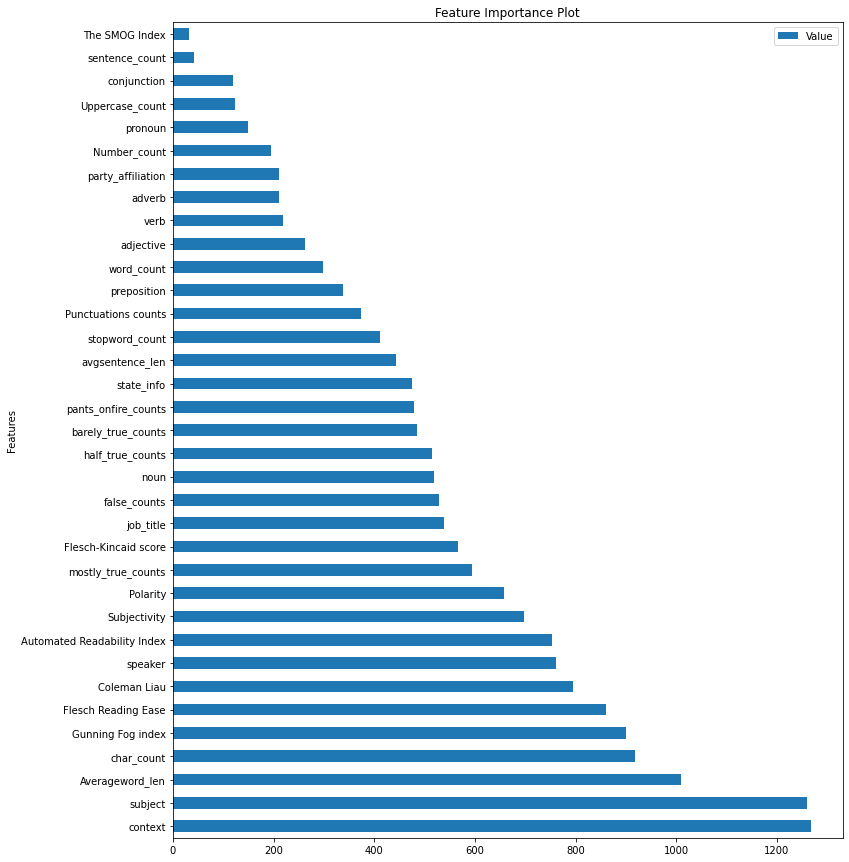

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 15)
pd.DataFrame({'Features':X_train.columns, 'Value':Lr.feature_importances_}).sort_values(by="Value",ascending=False).set_index('Features').plot(kind='barh')
plt.title('Feature Importance Plot')
plt.savefig('cc9.jpg')

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, Y_train )
print('Train Accuracy Score: ', rf.score(X_train, Y_train ) )
print('Test Accuracy Score: ', rf.score(X_test, Y_test ) )
print('Validation Accuracy Score: ', rf.score(X_val, Y_val ) )

Train Accuracy Score:  0.9998046875
Test Accuracy Score:  0.4159431728492502
Validation Accuracy Score:  0.43613707165109034


Text(0.5, 0, 'Relative Importance')

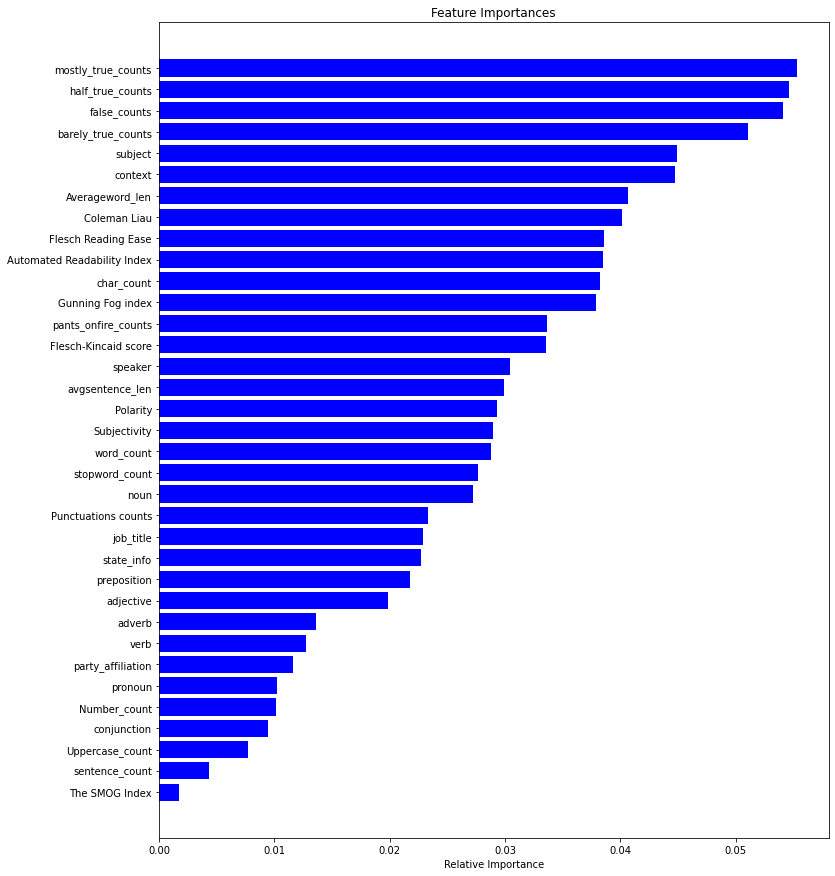

In [ ]:
import numpy as np
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')